In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer


Información del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unnamed: 0    18249 non-null  int64  
 1   date          18249 non-null  object 
 2   averageprice  18249 non-null  float64
 3   totalvolume   18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   totalbags     18249 non-null  float64
 8   smallbags     18249 non-null  float64
 9   largebags     18249 non-null  float64
 10  xlargebags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None

Primeros datos
   unnamed: 0        date  averageprice  totalvolume     4046       4225  \
0           0  20

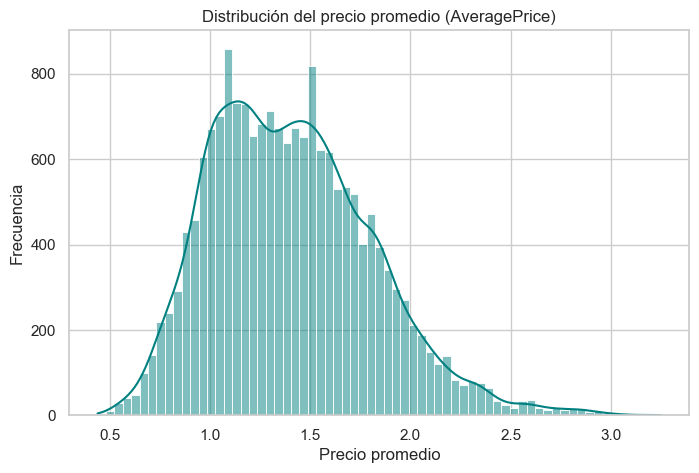

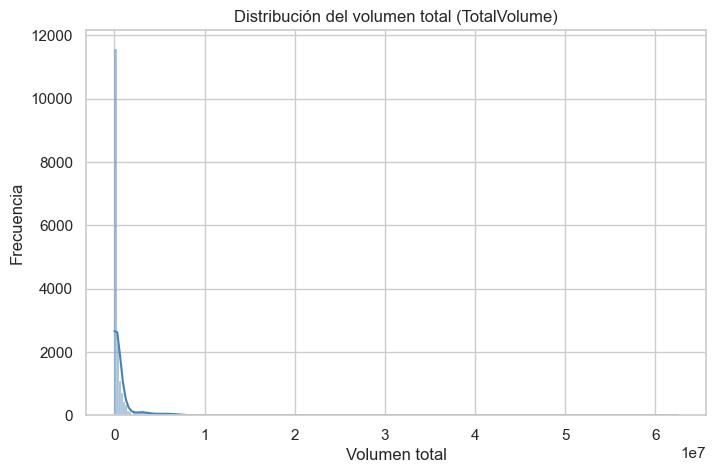

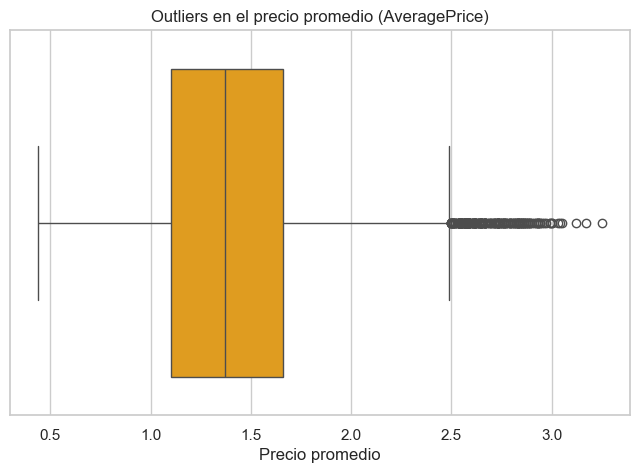

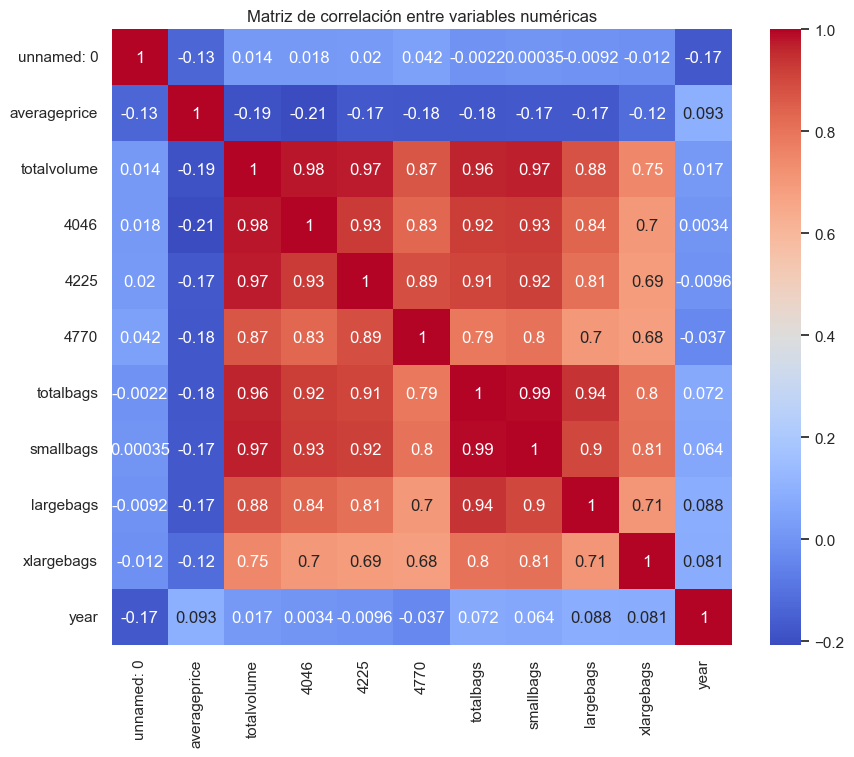

C:\Users\Manuel\AppData\Local\Temp\ipykernel_17964\3255925374.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="averageprice", data=df, palette="pastel")


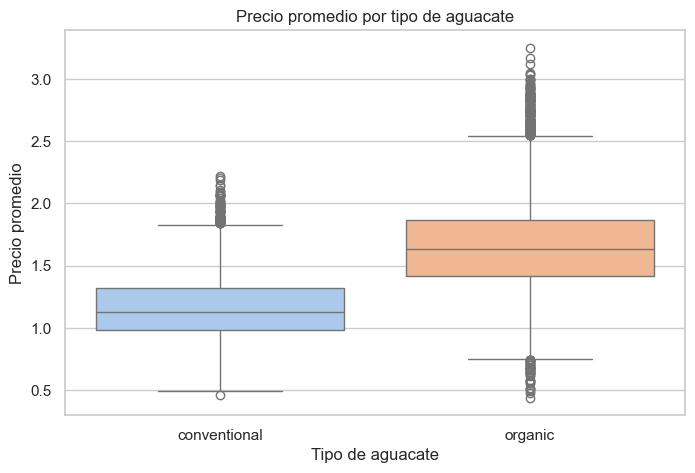

C:\Users\Manuel\AppData\Local\Temp\ipykernel_17964\3255925374.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")
C:\Users\Manuel\AppData\Local\Temp\ipykernel_17964\3255925374.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")


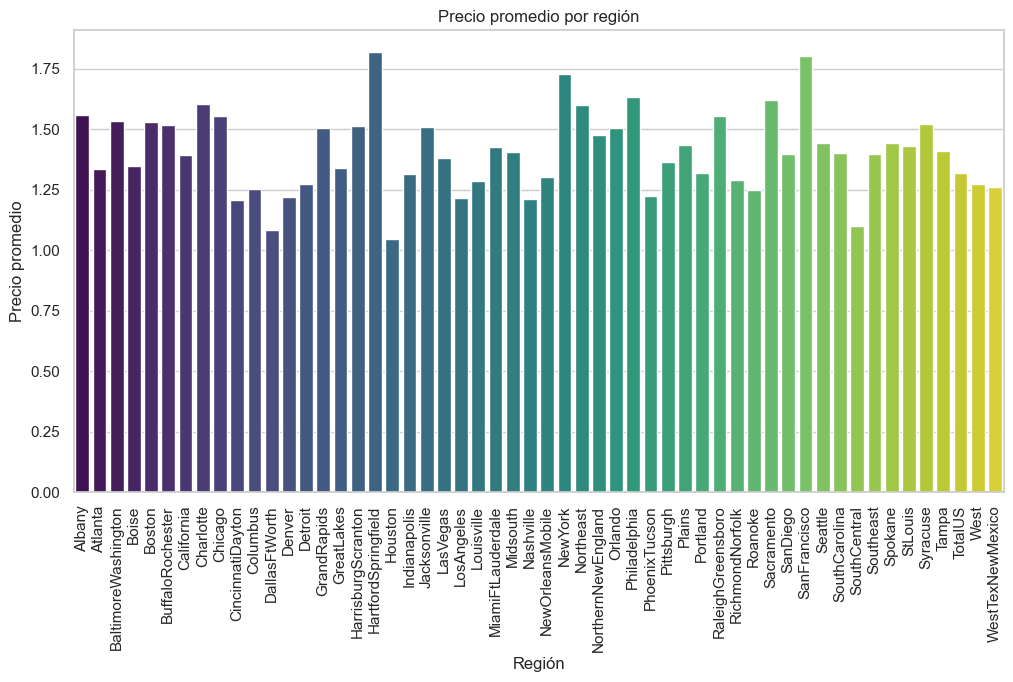

In [3]:
CSV_PATH = "avocado.csv"

df = pd.read_csv(CSV_PATH)
df.columns = [col.strip().lower() for col in df.columns]  # limpiar nombres de columnas

print("\nInformación del DataFrame")
print(df.info())
print("\nPrimeros datos")
print(df.head())
print("\nDescripción estadística")
print(df.describe())
print("\nNulos por columna")
print(df.isnull().sum())
print("\nduplicados por columna")
print(f"Filas duplicadas: {df.duplicated().sum()}")

sns.set_theme(style="whitegrid")


plt.figure(figsize=(8,5))
sns.histplot(df["averageprice"], kde=True, color="teal")
plt.title("Distribución del precio promedio (AveragePrice)")
plt.xlabel("Precio promedio")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df["totalvolume"], kde=True, color="steelblue")
plt.title("Distribución del volumen total (TotalVolume)")
plt.xlabel("Volumen total")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x=df["averageprice"], color="orange")
plt.title("Outliers en el precio promedio (AveragePrice)")
plt.xlabel("Precio promedio")
plt.show()


plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x="type", y="averageprice", data=df, palette="pastel")
plt.title("Precio promedio por tipo de aguacate")
plt.xlabel("Tipo de aguacate")
plt.ylabel("Precio promedio")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")
plt.xticks(rotation=90)
plt.title("Precio promedio por región")
plt.xlabel("Región")
plt.ylabel("Precio promedio")
plt.show()



Tamaño original del dataset: (18249, 14)

Valores nulos por columna antes de limpiar:
unnamed: 0      0
date            0
averageprice    0
totalvolume     0
4046            0
4225            0
4770            0
totalbags       0
smallbags       0
largebags       0
xlargebags      0
type            0
year            0
region          0
dtype: int64

Valores nulos después de limpieza:
unnamed: 0      0
date            0
averageprice    0
totalvolume     0
4046            0
4225            0
4770            0
totalbags       0
smallbags       0
largebags       0
xlargebags      0
type            0
year            0
region          0
dtype: int64

Tamaño después de eliminar outliers: (15770, 14)

Columnas tras convertir categóricas:
Index(['unnamed: 0', 'date', 'averageprice', 'totalvolume', '4046', '4225',
       '4770', 'totalbags', 'smallbags', 'largebags', 'xlargebags', 'year',
       'type_organic', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston

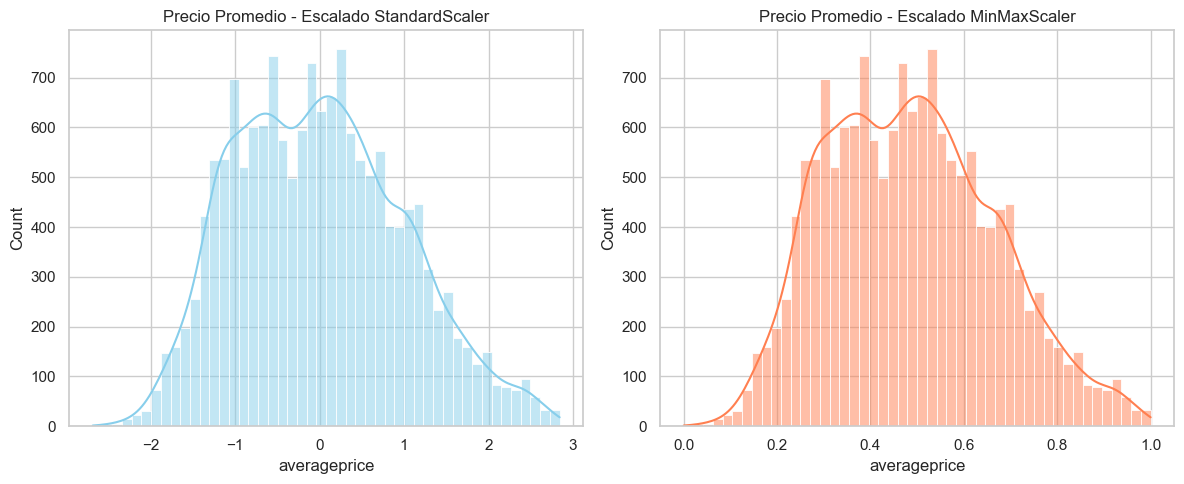

In [4]:

CSV_PATH = "avocado.csv"
df = pd.read_csv(CSV_PATH)
df.columns = [col.strip().lower() for col in df.columns]

print("Tamaño original del dataset:", df.shape)
print("\nValores nulos por columna antes de limpiar:")
print(df.isnull().sum())
df = df.dropna(subset=["averageprice", "totalvolume", "region", "type"])
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

print("\nValores nulos después de limpieza:")
print(df.isnull().sum())


def quitar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado
df = quitar_outliers(df, "averageprice")
df = quitar_outliers(df, "totalvolume")

print("\nTamaño después de eliminar outliers:", df.shape)
df = pd.get_dummies(df, columns=["type", "region"], drop_first=True)

print("\nColumnas tras convertir categóricas:")
print(df.columns)


scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

num_cols = df.select_dtypes(include=[np.number]).columns
df_standard = df.copy()
df_minmax = df.copy()

df_standard[num_cols] = scaler_std.fit_transform(df_standard[num_cols])
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

print("\n Normalización completada.")


fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_standard["averageprice"], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Precio Promedio - Escalado StandardScaler")

sns.histplot(df_minmax["averageprice"], kde=True, color="coral", ax=axes[1])
axes[1].set_title("Precio Promedio - Escalado MinMaxScaler")
plt.tight_layout()
plt.show()
